In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df=pd.read_csv('911.csv')

In [15]:
x=df['title'].iloc[0]

In [16]:
x.split(':')[0]

'EMS'

In [13]:
df['Reason'] = df['title'].apply(lambda title: title.split()[0])

In [14]:
df['Reason']

0             EMS:
1             EMS:
2            Fire:
3             EMS:
4             EMS:
5             EMS:
6             EMS:
7             EMS:
8             EMS:
9         Traffic:
10        Traffic:
11        Traffic:
12        Traffic:
13        Traffic:
14        Traffic:
15        Traffic:
16            EMS:
17            EMS:
18            EMS:
19        Traffic:
20        Traffic:
21        Traffic:
22           Fire:
23        Traffic:
24        Traffic:
25            EMS:
26            EMS:
27           Fire:
28        Traffic:
29        Traffic:
            ...   
127202        EMS:
127203    Traffic:
127204        EMS:
127205        EMS:
127206        EMS:
127207       Fire:
127208    Traffic:
127209        EMS:
127210        EMS:
127211    Traffic:
127212    Traffic:
127213    Traffic:
127214       Fire:
127215    Traffic:
127216        EMS:
127217        EMS:
127218    Traffic:
127219        EMS:
127220        EMS:
127221    Traffic:
127222    Traffic:
127223      

What is the most common Reason for a 911 call based off of this new column?

In [17]:
df['Reason'].value_counts()

EMS:        62442
Traffic:    45631
Fire:       19159
Name: Reason, dtype: int64

Countplot of 911 calls by Reason using seaborn

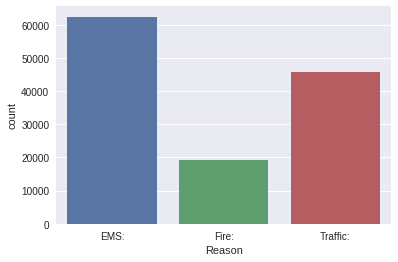

In [19]:
sns.countplot(x='Reason', data=df)

What is the data type of the objects in the timeStamp column?

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127232 entries, 0 to 127231
Data columns (total 10 columns):
lat          127232 non-null float64
lng          127232 non-null float64
desc         127232 non-null object
zip          110634 non-null float64
title        127232 non-null object
timeStamp    127232 non-null object
twp          127179 non-null object
addr         126598 non-null object
e            127232 non-null int64
Reason       127232 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 9.7+ MB


Based on the above info() for df, the Data column labeled timeStamp is an object type.

In [24]:
type(df['timeStamp'].iloc[0])

str

The timestamps are strings. Using pd.to_datetime will convert the column values from strings to DateTime objects.

In [25]:
df['timeStamp']= pd.to_datetime(df['timeStamp'])

In [26]:
type(df['timeStamp'].iloc[0])

pandas.tslib.Timestamp

We can now grab specific attributes from a Datetime object by calling them for example:

    time=df['timeStamp'].iloc[0]
    time.hour
  
We can use Jupyter's tab method to explore the various attributes we can call. Now that the timestamp column is actually DateTime objects, we use .apply() to create 3 new columns called Hour, Month, and Day of Week. These columns will be created based off of the timeStamp column.
    
    

In [40]:
time=df['timeStamp'].iloc[0]
time.hour

17

In [39]:
time

Timestamp('2015-12-10 17:10:52')

In [31]:
time.year

2015

In [32]:
time.dayofweek

3

In [34]:
time.month

12

Now we will call attributes off of the timeStamp column to create new Hour, Month, and Day of Week columns. 

In [36]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [38]:
df['Hour']

0         17
1         17
2         14
3         16
4         16
5         15
6         16
7         16
8         16
9         17
10        17
11        16
12        17
13        17
14        17
15        17
16        17
17        17
18        17
19        17
20        17
21        17
22        17
23        18
24        17
25        18
26        18
27        18
28        18
29        18
          ..
127202    14
127203    14
127204    14
127205    14
127206    14
127207    14
127208    14
127209    14
127210    14
127211    14
127212    14
127213    14
127214    14
127215    14
127216    14
127217    14
127218    14
127219    14
127220    14
127221    14
127222    14
127223    15
127224    15
127225    15
127226    15
127227    15
127228    15
127229    15
127230    15
127231    15
Name: Hour, dtype: int64

In [43]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [44]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS:,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS:,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire:,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS:,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS:,16,12,3


Notice how the Day of Week values are integers from 0-6. We will use .map() with this dictionary to map the actual string names to the day of the week:

    dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [45]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [46]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [47]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS:,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS:,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire:,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS:,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS:,16,12,Thu


Now we use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

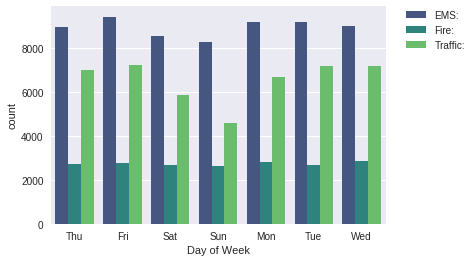

In [54]:
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')
# To relocate the Legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

Now we use seaborn to create a countplot of the Month column with the hue based off of the Reason column.

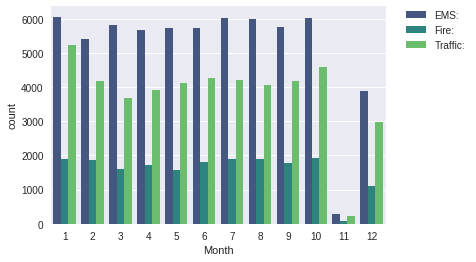

In [55]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
# To relocate the Legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

Create a groupby objected called byMonth, where the DataFrame is grouped by the month column and the count() method is used for agreegation.

In [59]:
byMonth = df.groupby('Month').count()

In [65]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11330,11330,11330,9899,11330,11330,11327,11287,11330,11330,11330,11330
5,11419,11419,11419,9942,11419,11419,11416,11374,11419,11419,11419,11419


Create a simple plot off of the dataframe indicating the count of calls per month.

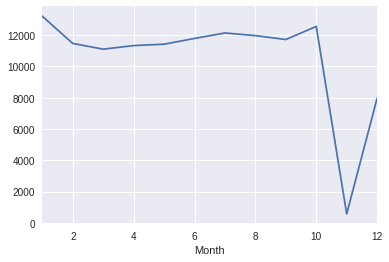

In [62]:
byMonth['lat'].plot()

Use seaborn's implot() to create a linear fit on the number of calls per month. 

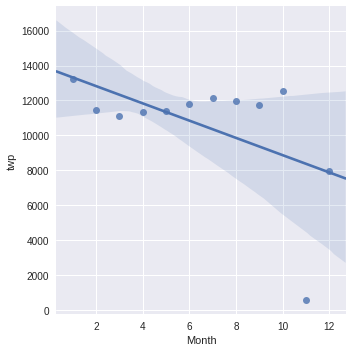

In [63]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

Create a new column called 'Date' that contains the date from the timeStamp column. Using apply() along with date() method.

In [69]:
t = df['timeStamp'].iloc[0]

In [70]:
t

Timestamp('2015-12-10 17:10:52')

In [72]:
t.date()

datetime.date(2015, 12, 10)

In [74]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

In [76]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS:,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS:,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire:,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS:,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS:,16,12,Thu,2015-12-10


In [79]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,116,116,116,101,116,116,116,114,116,116,116,116,116
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,404,404,404,334,404,404,404,402,404,404,404,404,404
2015-12-13,318,318,318,279,318,318,318,316,318,318,318,318,318
2015-12-14,446,446,446,386,446,446,445,444,446,446,446,446,446


In [81]:
df.groupby('Date').count()['lat']

Date
2015-12-10    116
2015-12-11    396
2015-12-12    404
2015-12-13    318
2015-12-14    446
2015-12-15    421
2015-12-16    377
2015-12-17    388
2015-12-18    346
2015-12-19    279
2015-12-20    272
2015-12-21    429
2015-12-22    448
2015-12-23    524
2015-12-24    448
2015-12-25    321
2015-12-26    295
2015-12-27    317
2015-12-28    380
2015-12-29    367
2015-12-30    359
2015-12-31    318
2016-01-01    263
2016-01-02    336
2016-01-03    323
2016-01-04    402
2016-01-05    448
2016-01-06    434
2016-01-07    385
2016-01-08    359
             ... 
2016-10-04    343
2016-10-05    446
2016-10-06    438
2016-10-07    478
2016-10-08    354
2016-10-09    373
2016-10-10    399
2016-10-11    420
2016-10-12    413
2016-10-13    399
2016-10-14    433
2016-10-15    387
2016-10-16    309
2016-10-17    452
2016-10-18    424
2016-10-19    457
2016-10-20    390
2016-10-21    498
2016-10-22    457
2016-10-23    327
2016-10-24    382
2016-10-25    360
2016-10-26    386
2016-10-27    405
2016-

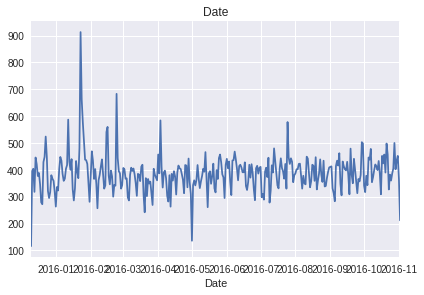

In [93]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Date')

Re-create this plot but create 3 separate plots with each plot representing a Reason for the 911 call.

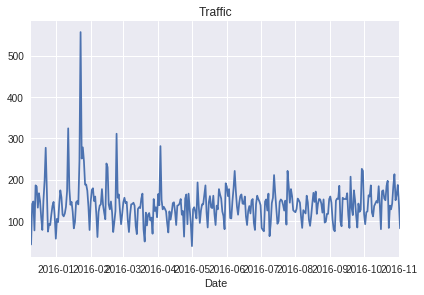

In [96]:
df[df['Reason']=='Traffic:'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Traffic')

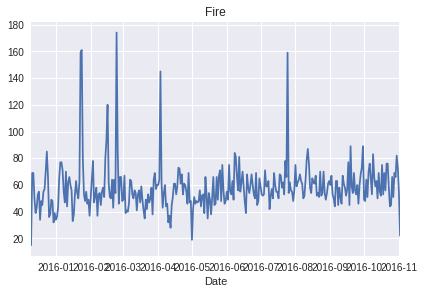

In [97]:
df[df['Reason']=='Fire:'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Fire')

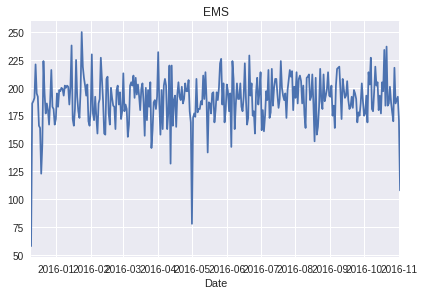

In [98]:
df[df['Reason']=='EMS:'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('EMS')

Create heatmaps with seaborn and our data. The dataframe will first be restructured so that the columns become the Hours and Index becomes the Day of the Week. The unstack method will be used, combined with groupby.

In [109]:
dayHour=df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()

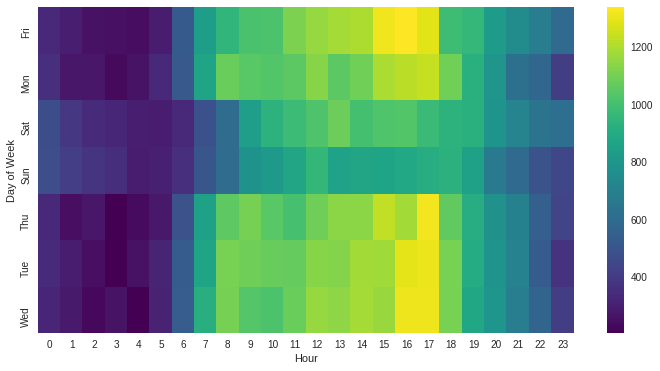

In [114]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')

Create a clustermap using this dataframe

ValueError: The condensed distance matrix must contain only finite values.

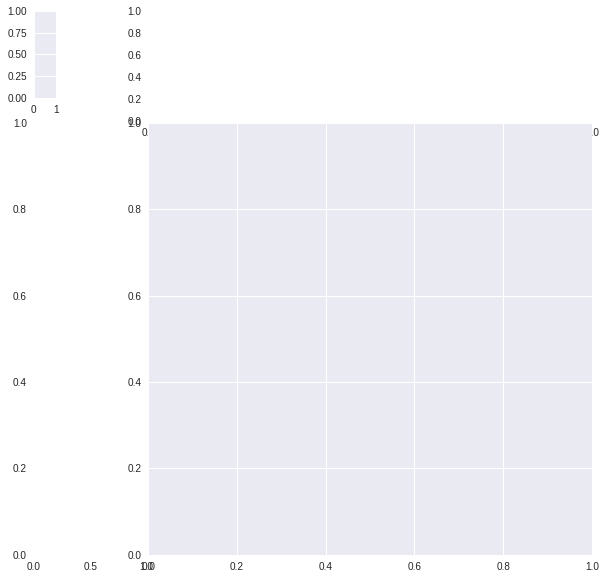

In [134]:
sns.clustermap(dayHour, cmap='viridis')

Repeat these plots and operation, for a dataframe that shows the Month as the column

In [126]:
dayMonth=df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,1965.0,1579.0,1527.0,1959.0,1735.0,1652.0,2047.0,1746.0,2204.0,1909.0,NaN,1063.0
Mon,1728.0,1965.0,1539.0,1598.0,1780.0,1615.0,1688.0,1880.0,1559.0,2063.0,NaN,1255.0
Sat,2296.0,1441.0,1267.0,1739.0,1442.0,1386.0,1694.0,1435.0,1414.0,1941.0,NaN,978.0
Sun,1956.0,1229.0,1100.0,1487.0,1417.0,1332.0,1674.0,1365.0,1240.0,1761.0,NaN,907.0
Thu,1590.0,1595.0,1894.0,1602.0,1589.0,2065.0,1645.0,1585.0,2169.0,1632.0,NaN,1270.0


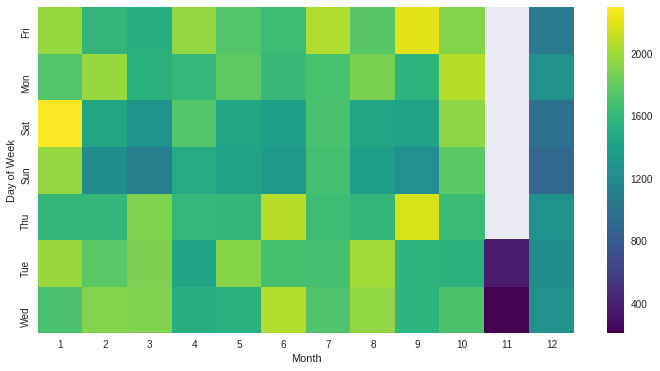

In [127]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='viridis')

ValueError: The condensed distance matrix must contain only finite values.

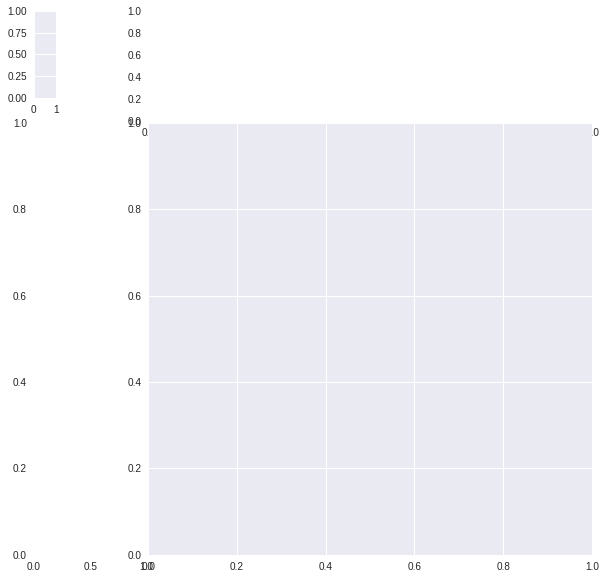

In [132]:
sns.clustermap(dayHour, cmap='viridis')